In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('train.csv')

data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data = data.T


X_train = data[1:n,:40000]
Y_train = data[0,:40000]
X_train = X_train / 255.

X_dev = data[1:n,40000:]
Y_dev = data[0,40000:]
X_dev = X_dev / 255.


In [4]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [5]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h1 = 10
    n_y = one_hot(Y).shape[0]

    return ( n_x , n_h1 , n_y )


In [6]:
def relu(X):
    return np.maximum(X, 0)

In [7]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [8]:
def initialize_parameters(n_x, n_h1, n_y):
    W1 = np.random.randn(n_h1 , n_x)*0.01
    b1 = np.zeros((n_h1, 1))
    W2 = np.random.randn(n_y , n_h1)*0.01 
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                }
    
    return parameters

In [9]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2
            }
    
    return cache

In [10]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]
    Z2 = cache["Z2"]
    Z1 = cache["Z1"]

    cost = (-1/m)*(np.sum(one_hot(Y)*np.log(A2) + (1-one_hot(Y))*np.log(1-A2)))
 
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A2.T)
    db2 = (1 / m) * np.sum(dZ2)



    dZ1 = W2.T.dot(dZ2) *(Z1>0)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1)



    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2

            }
    return grads , cost

    

In [11]:
def update_parameters(parameters, grads, learning_rate = 0.02):


    W1 = copy.deepcopy(parameters["W1"])
    b1 = copy.deepcopy(parameters["b1"])
    W2 = copy.deepcopy(parameters["W2"])
    b2 = copy.deepcopy(parameters["b2"])
    

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    

    W1 = W1 - dW1*learning_rate
    W2 = W2 - dW2*learning_rate
    b1 = b1 - db1*learning_rate
    b2 = b2 - db2*learning_rate
    

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  }
    
    return parameters
    

In [12]:
def nn_model(X, Y, num_iterations = 2000):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_h1 = layer_sizes(X, Y)[1]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x , n_h1 , n_y)
    
    costs = []
    for i in range(0, num_iterations):

        cache = forward_propagation(X , parameters)

        grads , cost = backward_propagation(parameters , cache , X , Y)
        costs.append(cost)

        parameters = update_parameters(parameters , grads , learning_rate=0.1 )

        if i % 100 == 0:
            print ("accuracy after iteration %i: %f" %(i,np.mean(np.argmax(cache["A2"] , 0)==Y) ))
    
    return parameters , costs

In [13]:
def predict(parameters, X):


    cache = forward_propagation(X ,parameters)
    predictions = np.argmax(cache["A2"],0)

    return predictions

In [14]:
parameters , costs = nn_model(X_train, Y_train,  num_iterations = 2000)
predictions = predict(parameters, X_train)
train_accuracy = np.mean(predictions == Y_train)
print(f"final train accuracy = {train_accuracy}")


accuracy after iteration 0: 0.136350
accuracy after iteration 100: 0.123775
accuracy after iteration 200: 0.111825
accuracy after iteration 300: 0.116175
accuracy after iteration 400: 0.183025
accuracy after iteration 500: 0.261725
accuracy after iteration 600: 0.356475
accuracy after iteration 700: 0.367850
accuracy after iteration 800: 0.427175
accuracy after iteration 900: 0.546425
accuracy after iteration 1000: 0.660600
accuracy after iteration 1100: 0.738675
accuracy after iteration 1200: 0.797925
accuracy after iteration 1300: 0.835750
accuracy after iteration 1400: 0.860075
accuracy after iteration 1500: 0.873550
accuracy after iteration 1600: 0.882675
accuracy after iteration 1700: 0.888350
accuracy after iteration 1800: 0.893350
accuracy after iteration 1900: 0.896475
final train accuracy = 0.898725


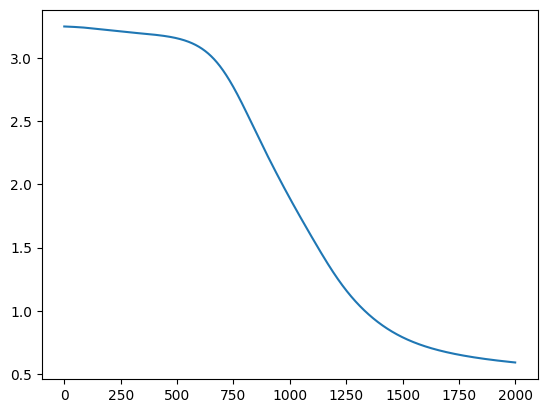

In [15]:
plt.plot(costs)
plt.show()

In [16]:
def test_prediction(index, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    current_image = X_train[:, index, None]
    prediction = predict(parameters,X_train[:, index, None])
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


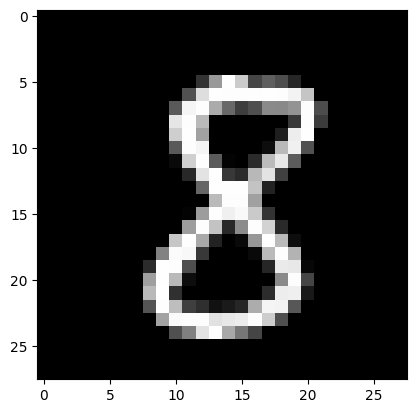

Prediction:  [4]
Label:  4


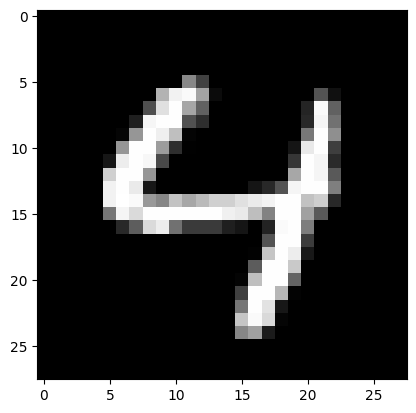

Prediction:  [0]
Label:  0


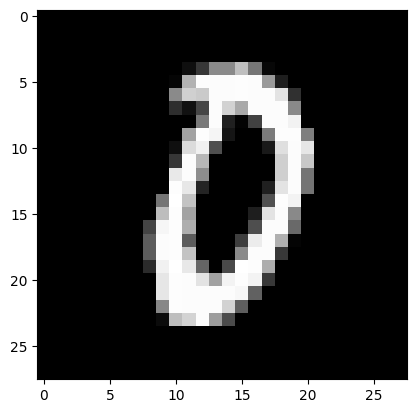

Prediction:  [6]
Label:  6


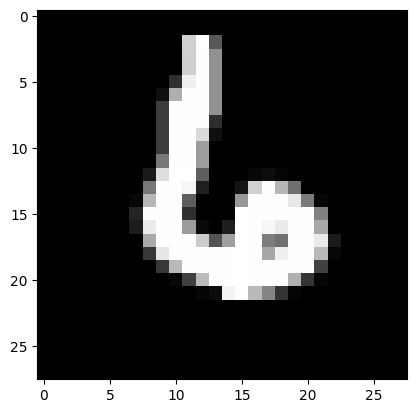

Prediction:  [1]
Label:  1


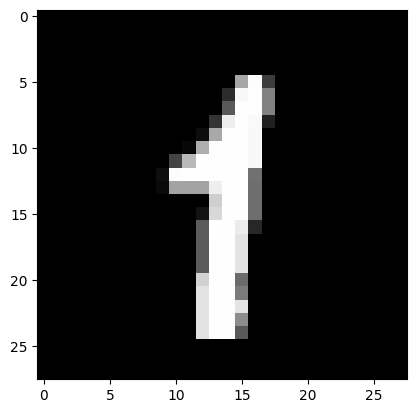

In [21]:
for i in range(5):
    test_prediction(i , parameters)

In [22]:
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [23]:
dev_predictions = predict(parameters,X_dev)
get_accuracy(dev_predictions, Y_dev)

0.895